# Chapter 10: Morphological Image Processing

This is the companion file for Chapter 10.


## Video 10.1

**Performing a dilation operation with a 3x3 square structuring element (first definition)**

Dilation of a set $A$ by a structuring element $B$ is the set of all displacements, $z = (z_1,z_2)$, such that the reflection, $\check{B}_z$ and $A$ overlap by at least one element.

![Alt text](https://raw.githubusercontent.com/hazalmogultay/466Images/master/W11/dilation.gif)

## Video 10.2

**Performing a dilation operation with a 3x3 square structuring element (second definition)**

Like in the convolution operation, the structuring element is swept over the image. As we translate, when the origin of the structuring element touches a binary 1-pixel, the entire  structuring element is **OR**ed to the output image, which was initialized to all zeros.

![Alt text](https://raw.githubusercontent.com/hazalmogultay/466Images/master/W11/dilation2.gif)

## Video 10.3

**Dilation of a binary image where the black pixels correspond to the object.**

Circular structuring elements of two different sizes, shown in the right, are used to close the holes and to enlarge the object.

![Alt text](https://raw.githubusercontent.com/hazalmogultay/466Images/master/W11/dilation3.gif)

## Programming exercise 10.1

1.   Run the following code to see the output of dilating the image with a square structuring element.
2.   Change the width of the structuring element to 5 and 45. How does the output change?
3.   Try different structuring elements (e.g. diamond).

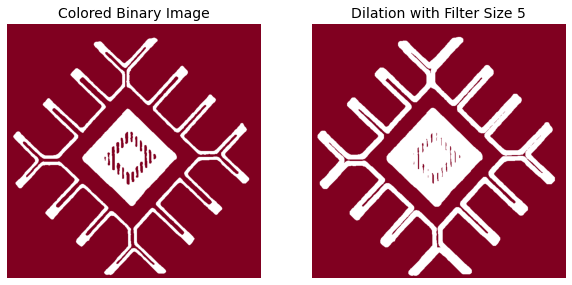

In [4]:
# Dilation
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import square, binary_dilation

# Load the image
image_path = "images/kilim1.png"  
grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(grayscale_image, 127, 255, cv2.THRESH_BINARY)

# Convert the high-res image to binary (thresholding)
binary_image = cv2.bitwise_not(binary_image)

# Define RGB values for white and burgundy
white_rgb = [255, 255, 255]  
burgundy_rgb = [128, 0, 32]     

# Create a color image from the binary image
colored_binary_image = np.zeros((binary_image.shape[0], binary_image.shape[1], 3), dtype=np.uint8)
colored_binary_image[binary_image == 255] = white_rgb  
colored_binary_image[binary_image == 0] = burgundy_rgb    

# Define the filter size
filter_size = 5
se = square(filter_size)

# Perform the binary operation on the high-res image
output_image = binary_dilation(binary_image, se)

# Convert processed binary output to RGB for saving
output_image_rgb = np.zeros((output_image.shape[0], output_image.shape[1], 3), dtype=np.uint8)
output_image_rgb[output_image == 0] = burgundy_rgb    
output_image_rgb[output_image == 1] = white_rgb     

# Display the colored binary and dilated images
plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.title("Colored Binary Image", fontsize=14)
plt.imshow(colored_binary_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Dilation with Filter Size {filter_size}", fontsize=14)
plt.imshow(output_image_rgb)
plt.axis('off')

plt.show()


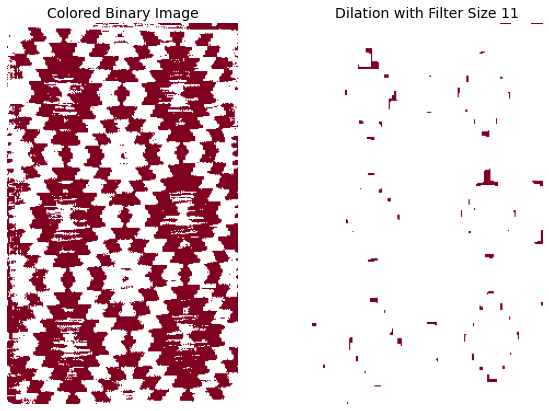

In [5]:
# Dilation
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import square, binary_dilation

# Try another image
image_path = "images/kilim_color.png"  
rgb_image = cv2.imread(image_path)

# Split the RGB image into its channels
blue_channel, green_channel, red_channel = cv2.split(rgb_image)

# Convert the blue channel to binary (thresholding)
_, binary_image = cv2.threshold(blue_channel, 127, 255, cv2.THRESH_BINARY)

# Convert the high-res image to binary (thresholding)
binary_image = cv2.bitwise_not(binary_image)

# Define RGB values for white and burgundy
white_rgb = [255, 255, 255]  
burgundy_rgb = [128, 0, 32]    

# Create a color image from the binary image
colored_binary_image = np.zeros((binary_image.shape[0], binary_image.shape[1], 3), dtype=np.uint8)
colored_binary_image[binary_image == 255] = white_rgb 
colored_binary_image[binary_image == 0] = burgundy_rgb    

# Define the filter size
filter_size = 11
se = square(filter_size)

# Perform the binary operation on the high-res image
output_image = binary_dilation(binary_image, se)

# Convert processed binary output to RGB for saving
output_image_rgb = np.zeros((output_image.shape[0], output_image.shape[1], 3), dtype=np.uint8)
output_image_rgb[output_image == 0] = burgundy_rgb    
output_image_rgb[output_image == 1] = white_rgb     

# Display the colored binary and dilated images
plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.title("Colored Binary Image", fontsize=14)
plt.imshow(colored_binary_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Dilation with Filter Size {filter_size}", fontsize=14)
plt.imshow(output_image_rgb)
plt.axis('off')

plt.show()


## Video 10.4

**Performing an erosion operation with a 3x3 square structuring element (first definition)**

Erosion of an image $A$ by a structuring element $B$ is the set of all points $z =(z_1,z_2)$ such that the reflected structuring element $ (\check B)_z$, translated by $z$, is fully contained in $A$.

![Alt text](https://raw.githubusercontent.com/hazalmogultay/466Images/master/W11/erosion.gif)

## Video 10.5

**Performing an erosion operation with a 3x3 square structuring element (second definition)**

The structuring element is swept over the image. At each position where every 1-pixel of the structuring element covers a 1-pixel of the binary image, the binary image pixel corresponding to the origin of the structuring element is **AND**ed  with the output image.

![Alt text](https://raw.githubusercontent.com/hazalmogultay/466Images/master/W11/erosion2.gif)

## Video 10.6

**Erosion of a binary image where the black pixels correspond to the object.**

Circular structuring elements of three different sizes, shown in the right, are used to break the bridges and to trim the object.

![Alt text](https://raw.githubusercontent.com/hazalmogultay/466Images/master/W11/erosion3.gif)

## Programming exercise 10.2:

1.   Run the following code to see the output of eroding the image with a square structuring element.
2.   Change the width of the structuring element to 5 and 21. How does the output change?
3.   Try different structuring elements (e.g. diamond).

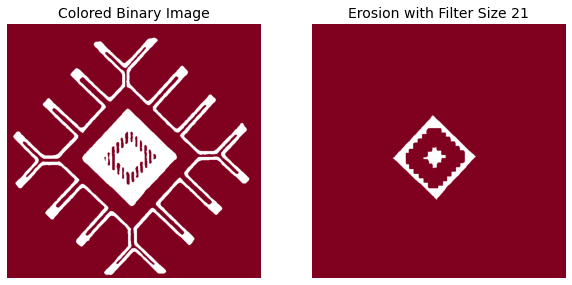

In [6]:
# Erosion
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import square, binary_erosion


# Load the image
image_path = "images/kilim1.png"  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
# Convert the high-res image to binary (thresholding)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

binary_image = cv2.bitwise_not(binary_image)

# Define RGB values for white and burgundy
white_rgb = [255, 255, 255]  
burgundy_rgb = [128, 0, 32]     

# Create a color image from the binary image
colored_binary_image = np.zeros((binary_image.shape[0], binary_image.shape[1], 3), dtype=np.uint8)
colored_binary_image[binary_image == 255] = white_rgb  
colored_binary_image[binary_image == 0] = burgundy_rgb    

# Define the filter size
filter_size = 21
se = square(filter_size)

# Perform the binary operation on the high-res image
output_image = binary_erosion(binary_image, se)

# Convert processed binary output to RGB for saving
output_image_rgb = np.zeros((output_image.shape[0], output_image.shape[1], 3), dtype=np.uint8)
output_image_rgb[output_image == 0] = burgundy_rgb    
output_image_rgb[output_image == 1] = white_rgb     

# Display the colored binary and dilated images
plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.title("Colored Binary Image", fontsize=14)
plt.imshow(colored_binary_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Erosion with Filter Size {filter_size}", fontsize=14)
plt.imshow(output_image_rgb)
plt.axis('off')

plt.show()


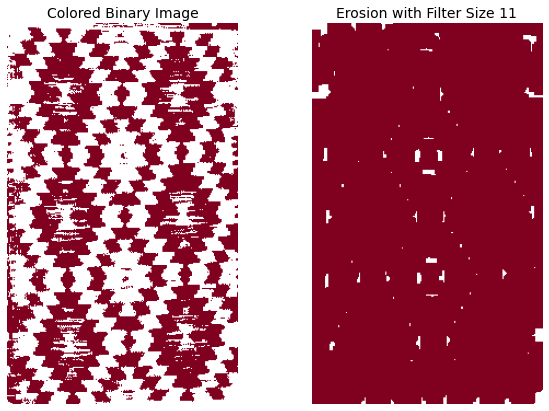

In [7]:
# Erosion
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import square, binary_erosion

# Try another image
image_path = "images/kilim_color.png"  
rgb_image = cv2.imread(image_path)

# Split the RGB image into its channels
blue_channel, green_channel, red_channel = cv2.split(rgb_image)

# Convert the blue channel to binary (thresholding)
_, binary_image = cv2.threshold(blue_channel, 127, 255, cv2.THRESH_BINARY)
binary_image = cv2.bitwise_not(binary_image)

# Define RGB values for white and burgundy
white_rgb = [255, 255, 255]  
burgundy_rgb = [128, 0, 32]     

# Create a color image from the binary image
colored_binary_image = np.zeros((binary_image.shape[0], binary_image.shape[1], 3), dtype=np.uint8)
colored_binary_image[binary_image == 255] = white_rgb  
colored_binary_image[binary_image == 0] = burgundy_rgb    

# Define the filter size
filter_size = 11
se = square(filter_size)

# Perform the binary operation on the high-res image
output_image = binary_erosion(binary_image, se)

# Convert processed binary output to RGB for saving
output_image_rgb = np.zeros((output_image.shape[0], output_image.shape[1], 3), dtype=np.uint8)
output_image_rgb[output_image == 0] = burgundy_rgb   
output_image_rgb[output_image == 1] = white_rgb     

# Display the colored binary and dilated images
plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.title("Colored Binary Image", fontsize=14)
plt.imshow(colored_binary_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Erosion with Filter Size {filter_size}", fontsize=14)
plt.imshow(output_image_rgb)
plt.axis('off')

plt.show()


## Video 10.7

**Opening of a binary image where the black pixels correspond to the object.**

Circular structuring elements of three different sizes, shown in the right, are used to open the image.

![Alt text](https://raw.githubusercontent.com/hazalmogultay/466Images/master/W11/opening.gif)

## Programming exercise 10.3:

1.   Run the following code to see the output of opening the image with a square structuring element.
2.   Change the width of the structuring element to 5 and 21. How does the output change?
3.   Try different structuring elements (e.g. diamond).

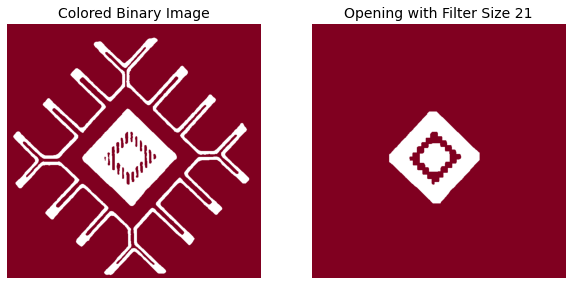

In [8]:
# Opening
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import square, binary_opening

# Load the image
image_path = "images/kilim1.png"  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert the high-res image to binary (thresholding)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
binary_image = cv2.bitwise_not(binary_image)

# Define RGB values for white and burgundy
white_rgb = [255, 255, 255]  
burgundy_rgb = [128, 0, 32]     

# Create a color image from the binary image
colored_binary_image = np.zeros((binary_image.shape[0], binary_image.shape[1], 3), dtype=np.uint8)
colored_binary_image[binary_image == 255] = white_rgb  
colored_binary_image[binary_image == 0] = burgundy_rgb    

# Define the filter size
filter_size = 21
se = square(filter_size)

# Perform the binary operation on the high-res image
output_image = binary_opening(binary_image, se)

# Convert processed binary output to RGB for saving
output_image_rgb = np.zeros((output_image.shape[0], output_image.shape[1], 3), dtype=np.uint8)
output_image_rgb[output_image == 0] = burgundy_rgb   
output_image_rgb[output_image == 1] = white_rgb     

# Display the colored binary and dilated images
plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.title("Colored Binary Image", fontsize=14)
plt.imshow(colored_binary_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Opening with Filter Size {filter_size}", fontsize=14)
plt.imshow(output_image_rgb)
plt.axis('off')

plt.show()


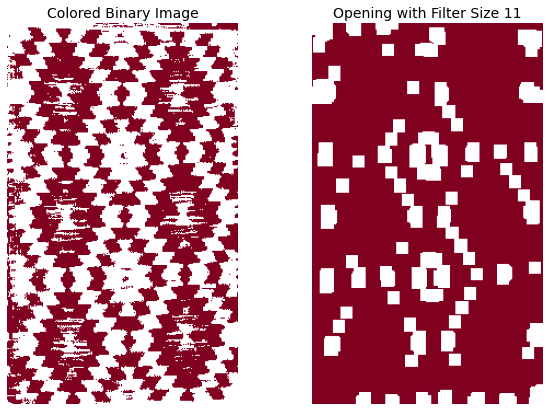

In [9]:
# Opening
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import square, binary_opening

# Try another image
image_path = "images/kilim_color.png"  
rgb_image = cv2.imread(image_path)

# Split the RGB image into its channels
blue_channel, green_channel, red_channel = cv2.split(rgb_image)

# Convert the blue channel to binary (thresholding)
_, binary_image = cv2.threshold(blue_channel, 127, 255, cv2.THRESH_BINARY)
binary_image = cv2.bitwise_not(binary_image)

# Define RGB values for white and burgundy
white_rgb = [255, 255, 255]  
burgundy_rgb = [128, 0, 32]     

# Create a color image from the binary image
colored_binary_image = np.zeros((binary_image.shape[0], binary_image.shape[1], 3), dtype=np.uint8)
colored_binary_image[binary_image == 255] = white_rgb  
colored_binary_image[binary_image == 0] = burgundy_rgb    

# Define the filter size
filter_size = 11
se = square(filter_size)

# Perform the binary operation on the high-res image
output_image = binary_opening(binary_image, se)

# Convert processed binary output to RGB for saving
output_image_rgb = np.zeros((output_image.shape[0], output_image.shape[1], 3), dtype=np.uint8)
output_image_rgb[output_image == 0] = burgundy_rgb    
output_image_rgb[output_image == 1] = white_rgb     

# Display the colored binary and dilated images
plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.title("Colored Binary Image", fontsize=14)
plt.imshow(colored_binary_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Opening with Filter Size {filter_size}", fontsize=14)
plt.imshow(output_image_rgb)
plt.axis('off')


plt.show()


## Programming exercise 10.4:

1.   Run the following code to see the output of closing the image with a square structuring element.
2.   Change the width of the structuring element to 5 and 45. How does the output change?
3.   Try different structuring elements (e.g. diamond).

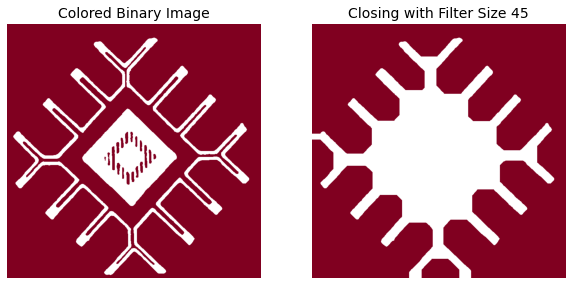

In [10]:
# Closing
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import square, binary_closing

# Load the image
image_path = "images/kilim1.png"  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert the high-res image to binary (thresholding)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
binary_image = cv2.bitwise_not(binary_image)

# Define RGB values for white and burgundy
white_rgb = [255, 255, 255]  
burgundy_rgb = [128, 0, 32]     

# Create a color image from the binary image
colored_binary_image = np.zeros((binary_image.shape[0], binary_image.shape[1], 3), dtype=np.uint8)
colored_binary_image[binary_image == 255] = white_rgb  # Foreground pixels to burgundy
colored_binary_image[binary_image == 0] = burgundy_rgb    # Background pixels to white

# Define the filter size
filter_size = 45
se = square(filter_size)

# Perform the binary operation on the high-res image
output_image = binary_closing(binary_image, se)

# Convert processed binary output to RGB for saving
output_image_rgb = np.zeros((output_image.shape[0], output_image.shape[1], 3), dtype=np.uint8)
output_image_rgb[output_image == 0] = burgundy_rgb    # Background pixels to white
output_image_rgb[output_image == 1] = white_rgb     # Foreground pixels to burgundy

# Display the colored binary and dilated images
plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.title("Colored Binary Image", fontsize=14)
plt.imshow(colored_binary_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Closing with Filter Size {filter_size}", fontsize=14)
plt.imshow(output_image_rgb)
plt.axis('off')

plt.show()


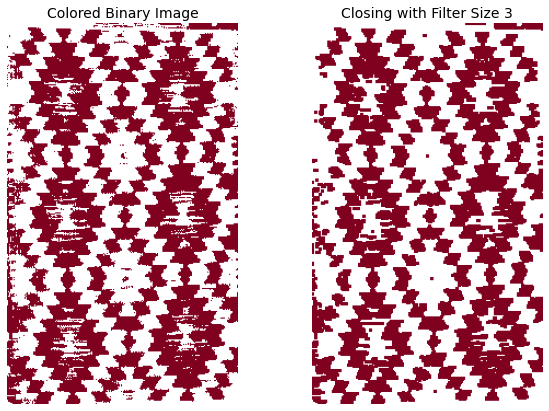

In [11]:
# Closing
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import square, binary_closing

# Try another image
image_path = "images/kilim_color.png"  
rgb_image = cv2.imread(image_path)

# Split the RGB image into its channels
blue_channel, green_channel, red_channel = cv2.split(rgb_image)

# Convert the blue channel to binary (thresholding)
_, binary_image = cv2.threshold(blue_channel, 127, 255, cv2.THRESH_BINARY)
binary_image = cv2.bitwise_not(binary_image)

# Define RGB values for white and burgundy
white_rgb = [255, 255, 255]  
burgundy_rgb = [128, 0, 32]     

# Create a color image from the binary image
colored_binary_image = np.zeros((binary_image.shape[0], binary_image.shape[1], 3), dtype=np.uint8)
colored_binary_image[binary_image == 255] = white_rgb  
colored_binary_image[binary_image == 0] = burgundy_rgb   


# Define the filter size
filter_size = 3
se = square(filter_size)

# Perform the binary operation on the high-res image
output_image = binary_closing(binary_image, se)

# Convert processed binary output to RGB for saving
output_image_rgb = np.zeros((output_image.shape[0], output_image.shape[1], 3), dtype=np.uint8)
output_image_rgb[output_image == 0] = burgundy_rgb    
output_image_rgb[output_image == 1] = white_rgb     

# Display the colored binary and dilated images
plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.title("Colored Binary Image", fontsize=14)
plt.imshow(colored_binary_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Closing with Filter Size {filter_size}", fontsize=14)
plt.imshow(output_image_rgb)
plt.axis('off')

plt.show()


## Programming exercise 10.5:

1.   Run the following code to perform boundary detection.


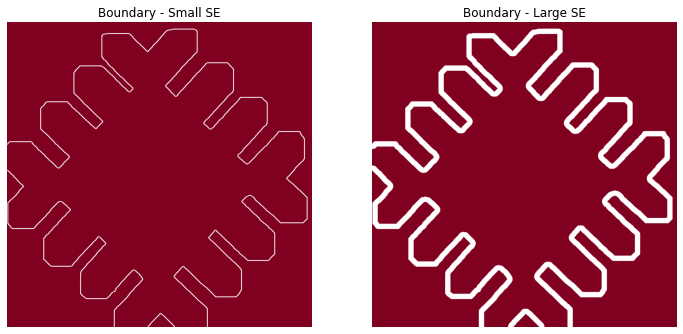

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply burgundy background
def apply_burgundy_background(binary_img):
    h, w = binary_img.shape
    burgundy = np.array([128, 0, 32], dtype=np.uint8)  # RGB color for burgundy
    white = np.array([255, 255, 255], dtype=np.uint8)  # RGB color for white

    color_image = np.zeros((h, w, 3), dtype=np.uint8)
    color_image[binary_img == 0] = burgundy
    color_image[binary_img == 1] = white
    return color_image

# Load the image
image_path = "images/boundary_ext.png"
rgb_image = cv2.imread(image_path)
gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
binary_image = binary_image // 255  # convert to 0/1

# Create circular structuring elements of two different sizes
kernel_small = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
kernel_large = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (25, 25))

# Erode and compute boundaries
eroded_small = cv2.erode(binary_image, kernel_small, iterations=1)
boundary_small = binary_image - eroded_small
boundary_small[boundary_small < 0] = 0

eroded_large = cv2.erode(binary_image, kernel_large, iterations=1)
boundary_large = binary_image - eroded_large
boundary_large[boundary_large < 0] = 0

# Apply burgundy background
boundary_small_burgundy = apply_burgundy_background(boundary_small)
boundary_large_burgundy = apply_burgundy_background(boundary_large)

# Display side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(boundary_small_burgundy)
plt.title('Boundary - Small SE')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(boundary_large_burgundy)
plt.title('Boundary - Large SE')
plt.axis('off')

plt.show()

# Function to save a NumPy RGB image as PDF
def save_as_pdf(image, filename):
    plt.figure(figsize=(6, 6))
    plt.axis('off')
    plt.imshow(image)  # image should be RGB
    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()

# Save boundaries as PDF
save_as_pdf(boundary_small_burgundy, "boundary_SE5.pdf")
save_as_pdf(boundary_large_burgundy, "boundary_SE25.pdf")


## Programming exercise 10.6:

1.   Run the following code to perform conditional dilation.


688 688


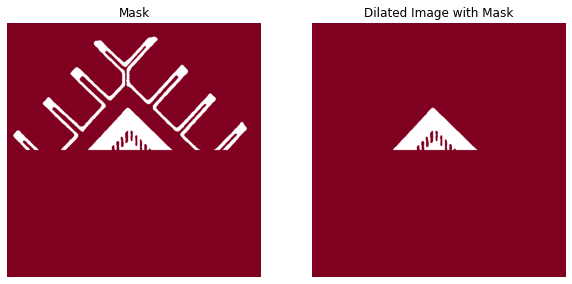

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the color image (RGB or BGR)
image = cv2.imread('images/kilim_bordo.png')  # Replace with your colored image path

# Convert to grayscale (binary thresholding will follow this)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply binarization to the grayscale image (using a threshold)
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# Get image dimensions
h, w = binary_image.shape

# Create the mask: Upper half of the binary image (copy the upper half)
mask = np.zeros_like(binary_image)

# Upper half of the image becomes the mask (same as the original binary image)
mask[:h//2, :] = binary_image[:h//2, :]

# Function to apply burgundy background
def apply_burgundy_background(binary_img):
    h, w = binary_img.shape
    burgundy = np.array([128, 0, 32], dtype=np.uint8)  # RGB color for burgundy
    white = np.array([255, 255, 255], dtype=np.uint8)  # RGB color for white

    # Create a 3-channel image
    color_image = np.zeros((h, w, 3), dtype=np.uint8)

    # Assign colors: Foreground → White, Background → Burgundy
    color_image[binary_img == 255] = white  
    color_image[binary_img == 0] = burgundy  

    return color_image

# Apply burgundy background transformation to the mask
mask_colored = apply_burgundy_background(mask)

# Create an image all black except for the center pixel (white)
initial_image = np.zeros_like(binary_image)
center_x, center_y = w // 2, h // 2
initial_image[center_y, center_x] = 255  # Set the center pixel to white

#initial_image = np.zeros_like(binary_image)
#start_x, start_y = 54, h//2
#initial_image[start_y, start_x] = 255  # Set the new starting pixel to white
print(w,h)
# Define a small structuring element for dilation
kernel = np.ones((5, 5), np.uint8)

# Perform dilation iteratively, using the intersection with the mask
dilated_image = initial_image.copy()

# Number of iterations for dilation
iterations = 100

for i in range(iterations):
    dilated_image = cv2.dilate(dilated_image, kernel, iterations=1)
    dilated_image = np.minimum(dilated_image, mask)  # Keep only the intersection with the mask

# Apply burgundy background transformation to the dilated image
dilated_colored = apply_burgundy_background(dilated_image)


# Visualize results
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(mask_colored)
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_colored)
plt.title('Dilated Image with Mask')
plt.axis('off')

plt.show()


## Programming exercise 10.7:

1.   Run the following code to perform region filling.

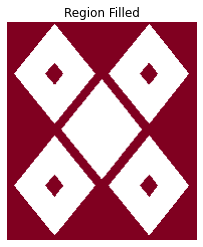

In [13]:
# Region Filling
import cv2
import numpy as np

# Load the color image
image = cv2.imread("images/region_filling_input.png")

# Convert to grayscale and then to binary
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

# Define the cross-shaped structuring element
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)

# Find the center point
h, w = binary.shape
seed = (h // 2, w // 2)

# Ensure the seed is inside the region
if binary[seed] == 255:  # If the center is part of the boundary, find a nearby inside point
    for r in range(1, min(h, w) // 2):
        for dy, dx in [(-r, 0), (r, 0), (0, -r), (0, r)]:  # Check in four directions
            ny, nx = seed[0] + dy, seed[1] + dx
            if 0 <= ny < h and 0 <= nx < w and binary[ny, nx] == 0:
                seed = (ny, nx)
                break
        if binary[seed] == 0:
            break

# Initialize region filling
filled = np.zeros_like(binary, dtype=np.uint8)
filled[seed] = 255  # Set the starting point

# Perform iterative region filling
while True:
    new_filled = cv2.dilate(filled, kernel) & ~binary  # Apply dilation and mask
    if np.array_equal(new_filled, filled):  # Stop when no changes
        break
    filled = new_filled

# Combine filled region with the original boundary
result = apply_burgundy_background(filled | binary)

plt.imshow(result)
plt.axis('off')
plt.title("Region Filled")
plt.show()


## Programming exercises 10.8

1.   Run the following code to see the output of thinning and skeletonization.

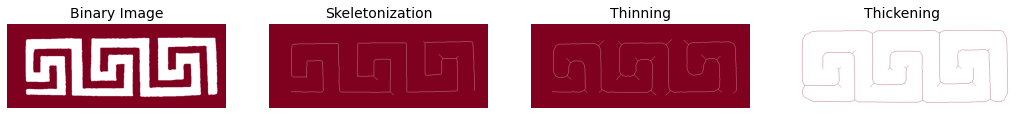

In [13]:
# Skeletonization, Thinning, and Thickening (true definition, with burgundy background and PDF saving)
from skimage.morphology import skeletonize, thin
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Function to apply burgundy background
def apply_burgundy_background(binary_img):
    h, w = binary_img.shape
    burgundy = np.array([128, 0, 32], dtype=np.uint8)  # RGB color for burgundy
    white = np.array([255, 255, 255], dtype=np.uint8)  # RGB color for white

    # Convert to 3-channel RGB image
    color_image = np.zeros((h, w, 3), dtype=np.uint8)
    color_image[binary_img == 0] = burgundy
    color_image[binary_img == 1] = white
    return color_image

# Load the image
image_path = "images/suyolu_color.png"  
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert the high-res image to binary (thresholding)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
binary_image = cv2.bitwise_not(binary_image)  # invert foreground/background

# Convert binary image from [0, 255] to [0, 1]
binary_image = binary_image // 255  # integers 0/1

# Skeletonization and thinning
skeleton = skeletonize(binary_image)
thinned = thin(binary_image)

# True thickening:
binary_complement = 1 - binary_image
thinned_complement = thin(binary_complement)
thickened = 1 - thinned_complement

# Apply burgundy background
binary_burgundy   = apply_burgundy_background(binary_image)
skeleton_burgundy = apply_burgundy_background(skeleton)
thinned_burgundy  = apply_burgundy_background(thinned)
thickened_burgundy= apply_burgundy_background(thickened)

# Display combined results (optional)
plt.figure(figsize=(18, 8))
plt.subplot(141), plt.imshow(binary_burgundy)
plt.title('Binary Image', fontsize=14), plt.axis('off')
plt.subplot(142), plt.imshow(skeleton_burgundy)
plt.title('Skeletonization', fontsize=14), plt.axis('off')
plt.subplot(143), plt.imshow(thinned_burgundy)
plt.title('Thinning', fontsize=14), plt.axis('off')
plt.subplot(144), plt.imshow(thickened_burgundy)
plt.title('Thickening', fontsize=14), plt.axis('off')
plt.show()


## Programming exercises 10.9

1.   Run the following code to see the output of applying dilation on each bit plane and reconstruction.

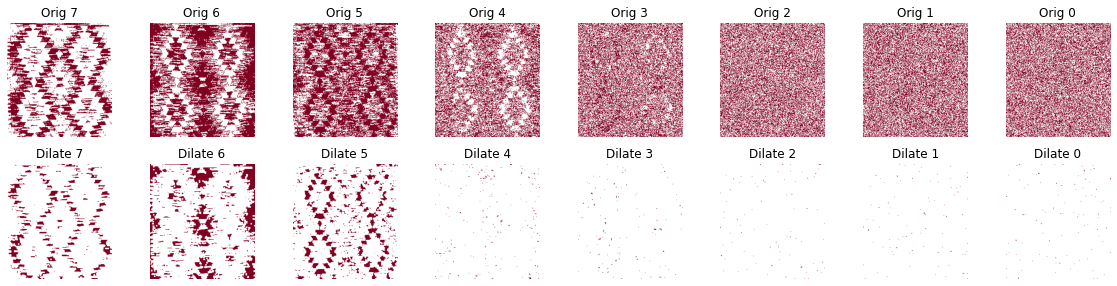

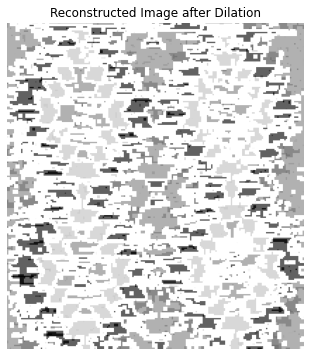

In [9]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from scipy.ndimage import binary_dilation

# ---------------- Load grayscale image ----------------
url = "https://raw.githubusercontent.com/itironal/466Companion/main/images/cropped_kilim_image.png"
response = urllib.request.urlopen(url)
image = Image.open(BytesIO(response.read())).convert('L')  # Convert to grayscale
image = np.array(image)  # 8-bit grayscale

# ---------------- Bit-plane decomposition ----------------
bit_planes = [(image >> i) & 1 for i in range(8)]  # Each bit plane contains 0s and 1s

# ---------------- Function to apply burgundy background ----------------
def apply_burgundy_background(binary_img):
    h, w = binary_img.shape
    burgundy = np.array([128, 0, 32], dtype=np.uint8)  # RGB color for burgundy
    white = np.array([255, 255, 255], dtype=np.uint8)  # RGB color for white
    color_image = np.zeros((h, w, 3), dtype=np.uint8)
    color_image[binary_img == 0] = burgundy
    color_image[binary_img == 1] = white
    return color_image

# ---------------- Apply small dilation to each bit plane ----------------
dilated_planes = [binary_dilation(bp, structure=np.ones((3,3))).astype(np.uint8) for bp in bit_planes]

# ---------------- Reconstruct image from dilated bit planes ----------------
reconstructed_dilated = sum(dilated_planes[i] << i for i in range(8)).astype(np.uint8)

# ---------------- Plot original and dilated bit planes ----------------
plt.figure(figsize=(16, 8))
for i in range(8):
    # Original bit plane
    plt.subplot(4, 8, i+1)
    plt.imshow(apply_burgundy_background(bit_planes[7-i]))
    plt.title(f'Orig {7-i}')
    plt.axis('off')
    # Dilated bit plane
    plt.subplot(4, 8, 8 + i+1)
    plt.imshow(apply_burgundy_background(dilated_planes[7-i]))
    plt.title(f'Dilate {7-i}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# ---------------- Show reconstructed image ----------------
plt.figure(figsize=(6, 6))
plt.imshow(reconstructed_dilated, cmap='gray')
plt.title("Reconstructed Image after Dilation")
plt.axis('off')
plt.show()


## Programming exercise 10.10:

1.   Run the following code to see the output of several morphological operations on the example grayscale image.

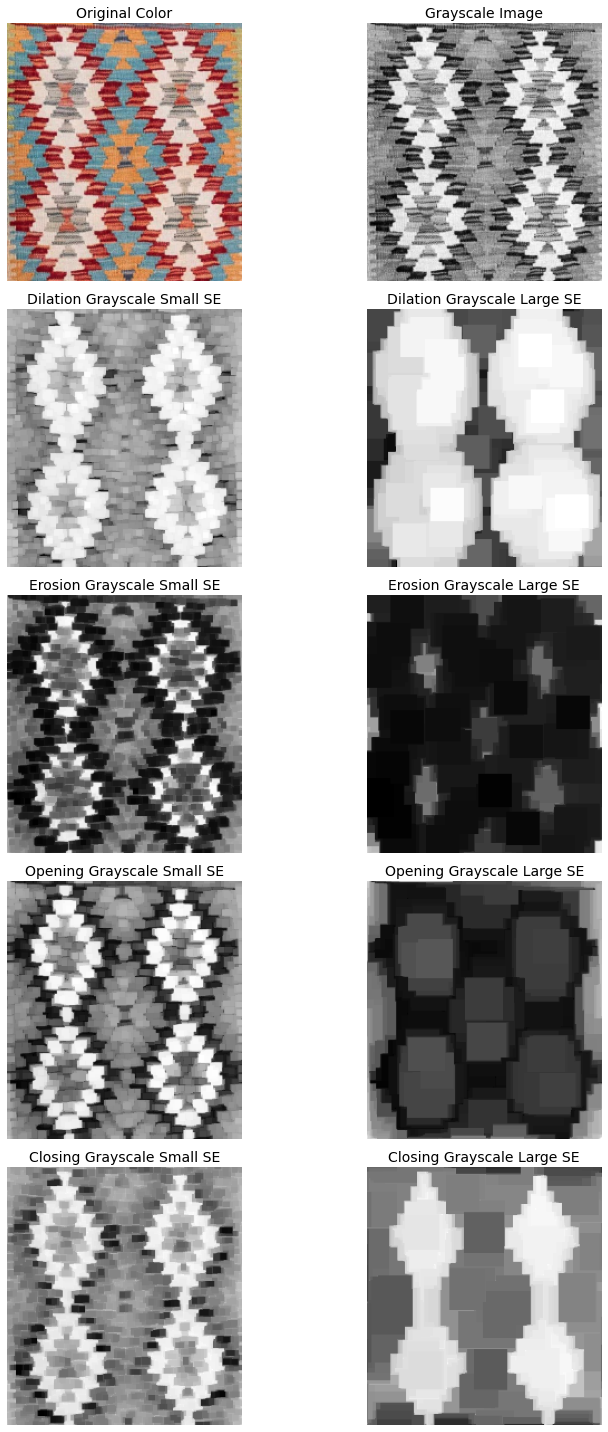

In [3]:
# Morphology comparison 5x2 (small vs large SE) with grayscale in filenames
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import dilation, erosion, opening, closing, square

# Helper function to save an image as PDF
def save_image_pdf(img, filename):
    plt.figure(figsize=(4, 4))
    plt.axis("off")
    if len(img.shape) == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap="gray")
    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()

# Load images
image_path = "images/cropped_kilim_image.png"
color_image = cv2.imread(image_path)
color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Define structuring elements
se_small = square(5)
se_large = square(30)

# Morphological operations
dilation_small = dilation(gray_image, se_small)
dilation_large = dilation(gray_image, se_large)

erosion_small = erosion(gray_image, se_small)
erosion_large = erosion(gray_image, se_large)

opening_small = opening(gray_image, se_small)
opening_large = opening(gray_image, se_large)

closing_small = closing(gray_image, se_small)
closing_large = closing(gray_image, se_large)

# Row-wise images and PDF filenames
images = [
    (color_image_rgb, gray_image, "Original_Color.pdf", "Grayscale_Image.pdf"),
    (dilation_small, dilation_large, "Dilation_Grayscale_Small.pdf", "Dilation_Grayscale_Large.pdf"),
    (erosion_small, erosion_large, "Erosion_Grayscale_Small.pdf", "Erosion_Grayscale_Large.pdf"),
    (opening_small, opening_large, "Opening_Grayscale_Small.pdf", "Opening_Grayscale_Large.pdf"),
    (closing_small, closing_large, "Closing_Grayscale_Small.pdf", "Closing_Grayscale_Large.pdf")
]

# Save all images as PDFs
for row_imgs in images:
    save_image_pdf(row_imgs[0], row_imgs[2])
    save_image_pdf(row_imgs[1], row_imgs[3])

# Optional: visualize 5x2 figure
fig, axes = plt.subplots(5, 2, figsize=(12, 20))
titles = [
    ["Original Color", "Grayscale Image"],
    ["Dilation Grayscale Small SE", "Dilation Grayscale Large SE"],
    ["Erosion Grayscale Small SE", "Erosion Grayscale Large SE"],
    ["Opening Grayscale Small SE", "Opening Grayscale Large SE"],
    ["Closing Grayscale Small SE", "Closing Grayscale Large SE"]
]

for i in range(5):
    for j in range(2):
        img = images[i][j]
        ax = axes[i, j]
        if len(img.shape) == 3:
            ax.imshow(img)
        else:
            ax.imshow(img, cmap="gray")
        ax.set_title(titles[i][j], fontsize=14)
        ax.axis("off")

plt.tight_layout()
plt.show()


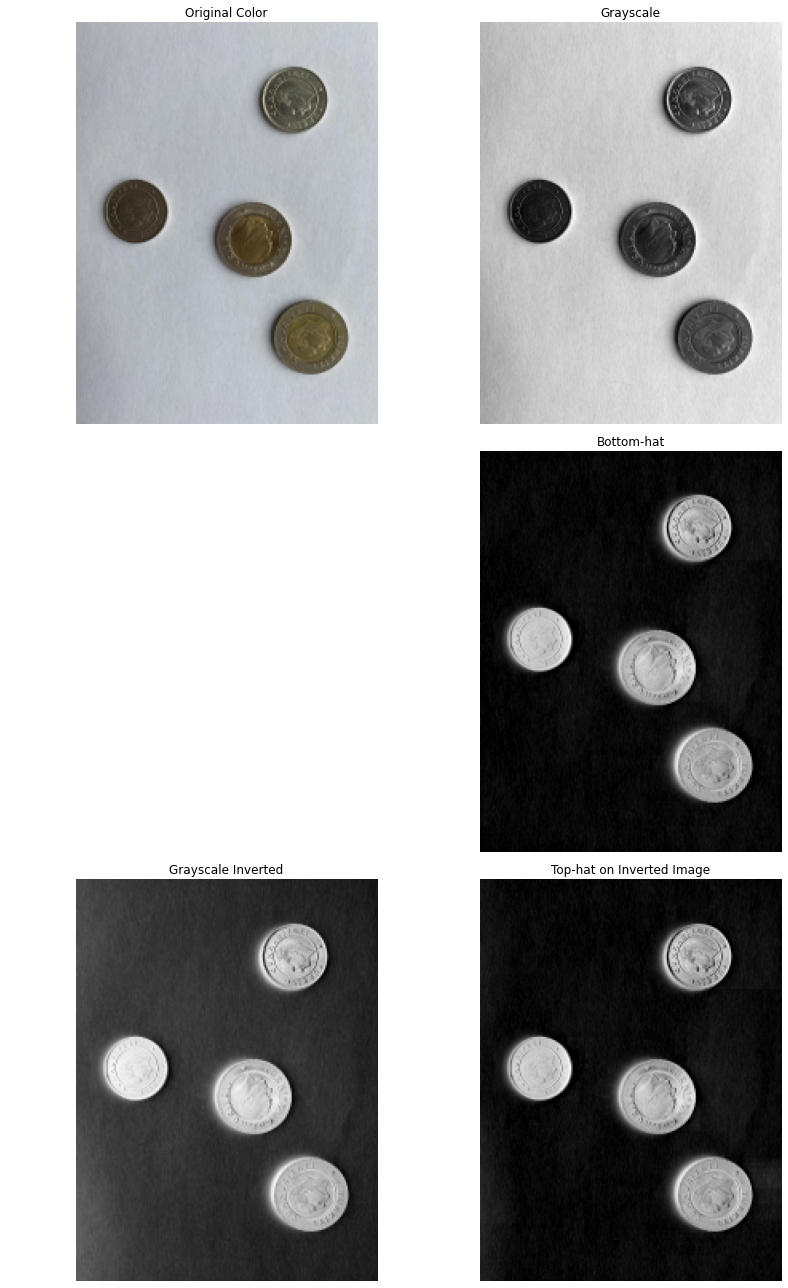

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import white_tophat, black_tophat, square
from skimage import io, color, img_as_ubyte

# Helper function to save image as PDF
def save_image_pdf(img, filename):
    plt.figure(figsize=(4, 4))
    plt.axis("off")
    if len(img.shape) == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap="gray")
    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()

# Load coins image and convert to grayscale
im_color = io.imread('coins.jpeg')  # Replace with path if needed
gray_image = img_as_ubyte(color.rgb2gray(im_color))

# Resize image by factor 1/16 to reduce processing load
scale_factor = 1/16
new_h = int(gray_image.shape[0] * scale_factor)
new_w = int(gray_image.shape[1] * scale_factor)
gray_resized = cv2.resize(gray_image, (new_w, new_h), interpolation=cv2.INTER_AREA)
color_resized = cv2.resize(im_color, (new_w, new_h), interpolation=cv2.INTER_AREA)

# Invert grayscale image
gray_inverted = 255 - gray_resized

# Define structuring element
se = square(50)

# Morphological operations
tophat = white_tophat(gray_resized, se)
bothat = black_tophat(gray_resized, se)

# Apply top-hat on inverted image
tophat_inverted_input = white_tophat(gray_inverted, se)

# Save PDFs
save_image_pdf(color_resized, "coins_color_resized.pdf")
save_image_pdf(gray_resized, "coins_grayscale_resized.pdf")
save_image_pdf(tophat, "coins_tophat_resized.pdf")
save_image_pdf(bothat, "coins_bothat_resized.pdf")
save_image_pdf(gray_inverted, "coins_grayscale_inverted_resized.pdf")
save_image_pdf(tophat_inverted_input, "coins_tophat_on_inverted_resized.pdf")

# Visualize
fig, axes = plt.subplots(3, 2, figsize=(12, 18))
axes[0, 0].imshow(color_resized)
axes[0, 0].set_title("Original Color")
axes[0, 1].imshow(gray_resized, cmap="gray")
axes[0, 1].set_title("Grayscale")
axes[1, 1].imshow(bothat, cmap="gray")
axes[1, 1].set_title("Bottom-hat")
axes[2, 0].imshow(gray_inverted, cmap="gray")
axes[2, 0].set_title("Grayscale Inverted")
axes[2, 1].imshow(tophat_inverted_input, cmap="gray")
axes[2, 1].set_title("Top-hat on Inverted Image")

for ax in axes.ravel():
    ax.axis("off")

plt.tight_layout()
plt.show()


## Programming exercise 10.11:
1. Run the following code to see the output of morphological smoothing.

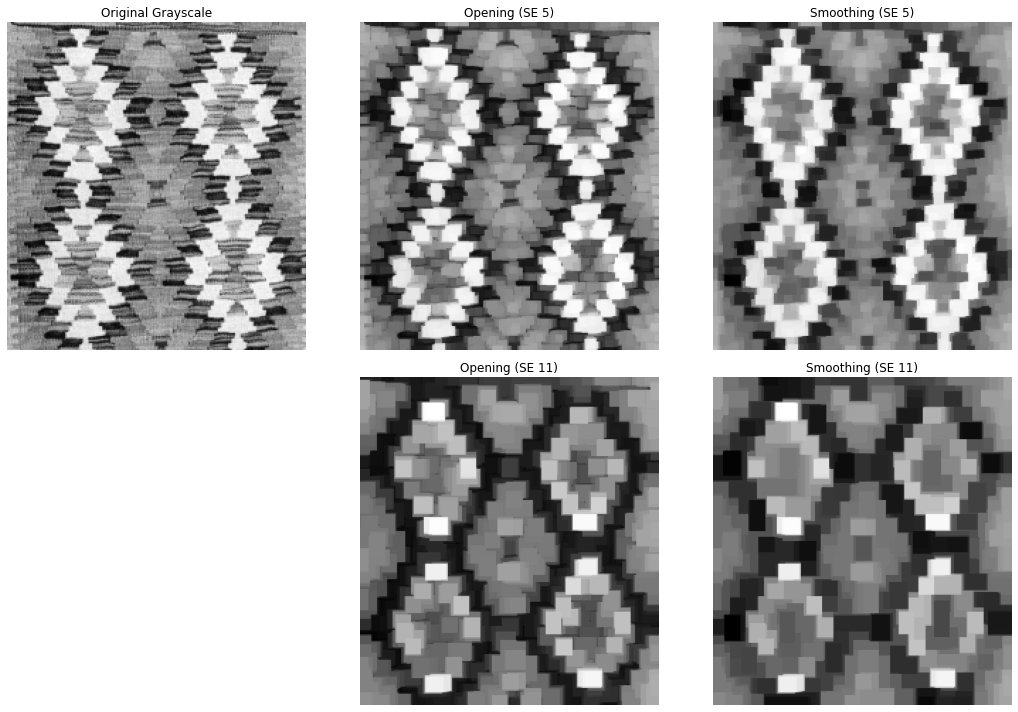

In [12]:
# Morphological smoothing with PDF saving
import matplotlib.pyplot as plt
from skimage.morphology import opening, closing, square
import cv2

# Load the grayscale image
image_path = "images/cropped_kilim_image.png"
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define two structuring elements
se_small = square(5)
se_large = square(11)

# Morphological smoothing (opening followed by closing)
# Small SE
opening_small = opening(gray_image, se_small)
smoothing_small = closing(opening_small, se_small)

# Large SE
opening_large = opening(gray_image, se_large)
smoothing_large = closing(opening_large, se_large)

# Function to save a grayscale image as PDF
def save_as_pdf(img, filename):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()

# Save each output as PDF
save_as_pdf(gray_image, "Original_Grayscale.pdf")
save_as_pdf(opening_small, "Opening_SE5.pdf")
save_as_pdf(smoothing_small, "Smoothing_SE5.pdf")
save_as_pdf(opening_large, "Opening_SE11.pdf")
save_as_pdf(smoothing_large, "Smoothing_SE11.pdf")

# Optional: display combined figure
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1), plt.imshow(gray_image, cmap='gray'), plt.title('Original Grayscale'), plt.axis('off')
plt.subplot(2, 3, 2), plt.imshow(opening_small, cmap='gray'), plt.title('Opening (SE 5)'), plt.axis('off')
plt.subplot(2, 3, 3), plt.imshow(smoothing_small, cmap='gray'), plt.title('Smoothing (SE 5)'), plt.axis('off')
plt.subplot(2, 3, 5), plt.imshow(opening_large, cmap='gray'), plt.title('Opening (SE 11)'), plt.axis('off')
plt.subplot(2, 3, 6), plt.imshow(smoothing_large, cmap='gray'), plt.title('Smoothing (SE 11)'), plt.axis('off')
plt.tight_layout()
plt.show()


## Programming exercise 10.12:
1. Run the following code to see the output of morphological gradient.

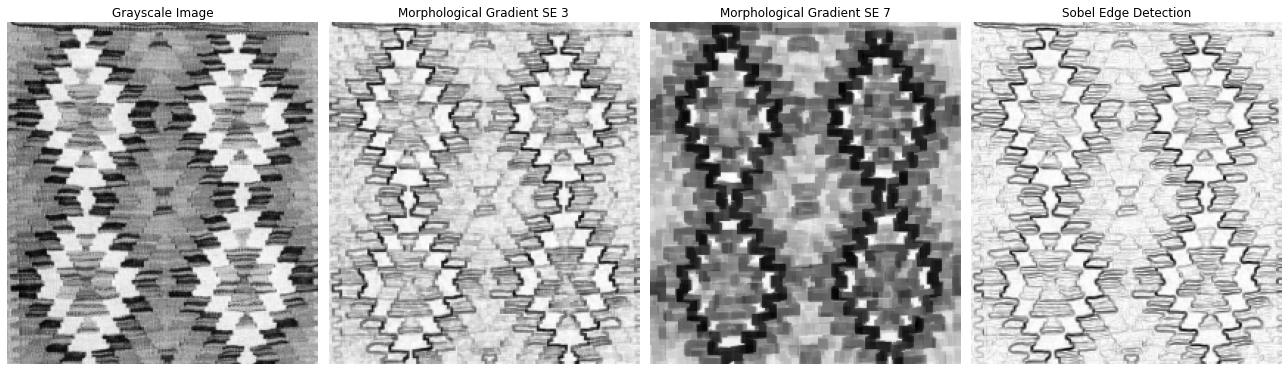

In [20]:
import cv2
import matplotlib.pyplot as plt
from skimage.morphology import dilation, erosion, square
from skimage.filters import sobel

# Load the grayscale image
image_path = "images/cropped_kilim_image.png"
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define two structuring elements
se_small = square(3)
se_large = square(7)

# Function to compute inverted morphological gradient and save PDF
def save_inverted_gradient(image, se, filename):
    dilation_output = dilation(image, se)
    erosion_output = erosion(image, se)
    gradient = dilation_output - erosion_output
    gradient_inv = 255 - gradient  # invert for visualization

    # Save PDF
    plt.figure(figsize=(6,6))
    plt.imshow(gradient_inv, cmap='gray')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()

# Save inverted gradients
save_inverted_gradient(gray_image, se_small, "Morphological_Gradient_SE3.pdf")
save_inverted_gradient(gray_image, se_large, "Morphological_Gradient_SE7.pdf")

# Compute Sobel edge detection
sobel_edges = sobel(gray_image)
sobel_edges = 255 - sobel_edges

# Save Sobel result as PDF
plt.figure(figsize=(6,6))
plt.imshow(sobel_edges, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.savefig("Sobel.pdf", bbox_inches='tight', pad_inches=0)
plt.close()

# Optional: visualize all
plt.figure(figsize=(18,6))
plt.subplot(141)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(142)
plt.imshow(255 - (dilation(gray_image, se_small) - erosion(gray_image, se_small)), cmap='gray')
plt.title('Morphological Gradient SE 3')
plt.axis('off')

plt.subplot(143)
plt.imshow(255 - (dilation(gray_image, se_large) - erosion(gray_image, se_large)), cmap='gray')
plt.title('Morphological Gradient SE 7')
plt.axis('off')

plt.subplot(144)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()


## Programming exercise 10.13:

1.   Run the following code to perform morphological segmentation.

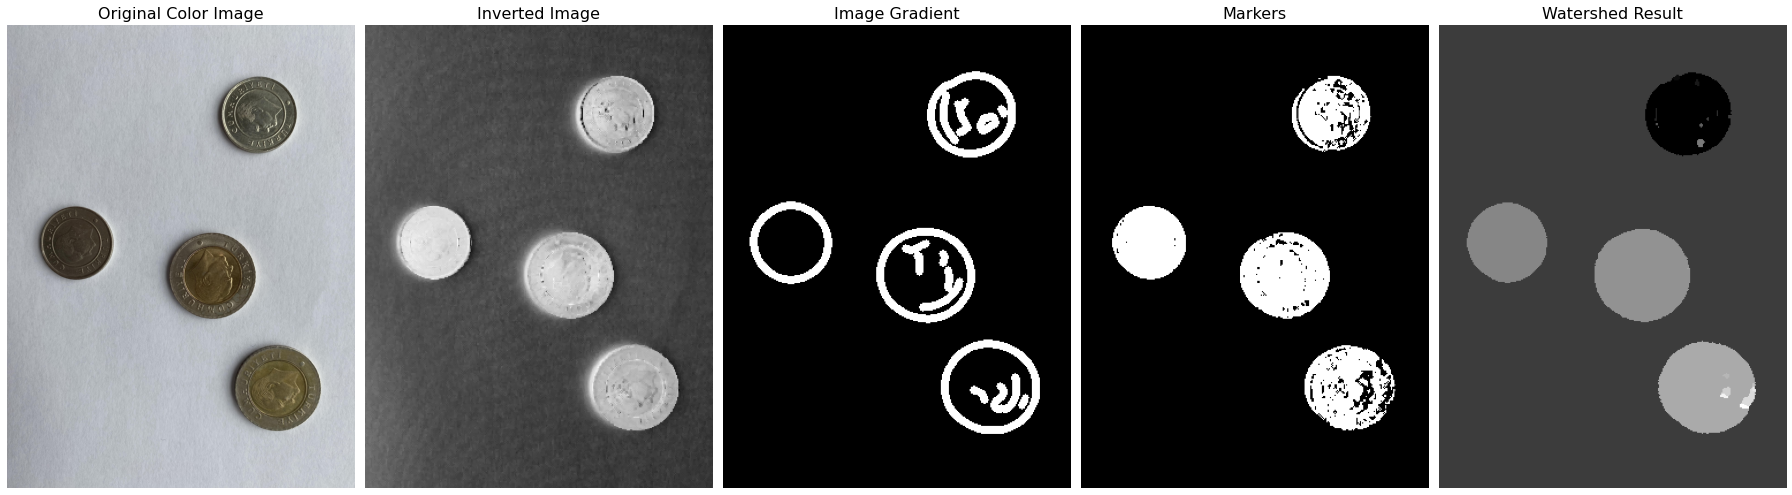

In [25]:
import matplotlib.pyplot as plt
from skimage import io, feature, color, img_as_ubyte
from skimage.filters import sobel
from skimage.morphology import disk, dilation
from skimage.filters.rank import median
from skimage.transform import rescale
from skimage.measure import label
from skimage.segmentation import watershed
import numpy as np

# Load the color image
im_color = io.imread('coins.jpeg')

# Convert to grayscale
im_g = color.rgb2gray(im_color)

# Rescale and invert the image
im = img_as_ubyte(rescale(im_g, 0.1, anti_aliasing=False))
im = np.invert(im)

# Apply median filter
im = median(im, disk(1))

# Detect edges with Canny edge detector
im_gradient = feature.canny(im, sigma=3, low_threshold=15, high_threshold=20)

# Apply dilation (edges become thicker)
im_gradient = dilation(im_gradient, disk(3))

# Find markers from background and coins
markers = np.zeros_like(im)
markers[im > 160] = 2
markers[im < 20] = 1
label_img2 = label(markers)

# Apply Watershed algorithm
labels1 = watershed(im_gradient, markers=label_img2)

# Function to save an image as PDF
def save_pdf(img, filename, cmap=None):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()

# Save each image as PDF
save_pdf(im_color, "coins_color.pdf")          # Original color
save_pdf(im, "coins_inverted.pdf", cmap='gray') # Inverted
save_pdf(im_gradient, "coins_gradient.pdf", cmap='gray') # Gradient
save_pdf(markers.astype(int), "coins_markers.pdf", cmap='gray') # Markers
save_pdf(labels1, "coins_watershed.pdf", cmap='gray') # Watershed result

# Display all images
plt.figure(figsize=(25, 8))

plt.subplot(151)
plt.imshow(im_color)
plt.title('Original Color Image', fontsize=16)
plt.axis('off')

plt.subplot(152)
plt.imshow(im, cmap='gray')
plt.title('Inverted Image', fontsize=16)
plt.axis('off')

plt.subplot(153)
plt.imshow(im_gradient, cmap='gray')
plt.title('Image Gradient', fontsize=16)
plt.axis('off')

plt.subplot(154)
plt.imshow(markers.astype(int), cmap='gray')
plt.title('Markers', fontsize=16)
plt.axis('off')

plt.subplot(155)
plt.imshow(labels1, cmap='gray')
plt.title('Watershed Result', fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()

